# 1. Gyakorlat: Bevezetés a megerősítéses tanulásba

In [68]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(42)

## Markov láncok

In [69]:
p_s_a = [
    [0.7, 0.2, 0.0, 0.1],  # s0 --> [s1, s2, s3, s4]
    [0.0, 0.0, 0.9, 0.1],  # s1 --> [s1, s2, s3, s4]
    [0.0, 1.0, 0.0, 0.0],  # s2 --> [s1, s2, s3, s4]
    [0.0, 0.0, 0.0, 1.0],  # s3 --> [s1, s2, s3, s4]
]

max_lepes = 50  # Max. lépésszám
s_T = 3  # Terminális állapot

def lanc_futtatasa():
    s_t = 0
    print("Állapotok:", end=" ")
    for _ in range(max_lepes):
        print(f's{s_t}', end=" ")
        if s_t == s_T:  # Terminális állpot esetén kilépés 
            break
        s_t = np.random.choice(range(4), p=p_s_a[s_t])
    else:
        print("...", end="")
    print()

for _ in range(10):
    lanc_futtatasa()

Állapotok: s0 s0 s3 
Állapotok: s0 s1 s2 s1 s2 s1 s2 s1 s2 s1 s3 
Állapotok: s0 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s3 
Állapotok: s0 s3 
Állapotok: s0 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s3 
Állapotok: s0 s1 s3 
Állapotok: s0 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 ...
Állapotok: s0 s0 s3 
Állapotok: s0 s0 s0 s1 s2 s1 s2 s1 s3 
Állapotok: s0 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s2 s1 s3 


## Markov döntési folyamatok
Például az $s_0$ állapotban, ha az $a_0$ cselekvést választjuk, akkor $0.7$ valószínűséggel az $s_0$ állapotba kerülünk $+10$ jutalommal, $0.3$ valószínűséggel az $s_1$ állapotba kerülünk jutalom nélkül, és soha nem kerülünk az $s_2$ állapotba (tehát az átmeneti valószínűségek $[0.7, 0.3, 0.0]$, a R pedig $[+10, 0, 0]$):

In [70]:
p_s_a = [  # Állapotátmeneti valószínűségek (környezeti dinamika) [s, a, s']
        [[0.7, 0.3, 0.0],  # s0 --> a0 --> [s0, s1, s2]
         [1.0, 0.0, 0.0],  # s0 --> a1 --> [s0, s1, s2]
         [0.8, 0.2, 0.0]], # s0 --> a2 --> [s0, s1, s2]
        [[0.0, 1.0, 0.0],  # s1 --> a0 --> [s0, s1, s2]
         None,             # s1 --> a1 --> [s0, s1, s2]
         [0.0, 0.0, 1.0]], # s1 --> a2 --> [s0, s1, s2]
        [None,             # s2 --> a0 --> [s0, s1, s2]
         [0.8, 0.1, 0.1],  # s2 --> a1 --> [s0, s1, s2]
         None]             # s2 --> a2 --> [s0, s1, s2]
]

R = [  # Jutalmak [s, a, s']
        [[+10, 0, 0],   # s0 --> a0 --> [r0, r1, r2] 
         [0, 0, 0],     # s0 --> a1 --> [r0, r1, r2] 
         [0, 0, 0]],    # s0 --> a2 --> [r0, r1, r2] 
        [[0, 0, 0],     # s1 --> a0 --> [r0, r1, r2] 
         [0, 0, 0],     # s1 --> a1 --> [r0, r1, r2] 
         [0, 0, -50]],  # s1 --> a2 --> [r0, r1, r2] 
        [[0, 0, 0],     # s2 --> a0 --> [r0, r1, r2] 
         [+40, 0, 0],   # s2 --> a1 --> [r0, r1, r2] 
         [0, 0, 0]],    # s2 --> a2 --> [r0, r1, r2] 
]

A = [  # Lehetséges cselekvések halmaza
        [0, 1, 2],  #  s0 --> s0, s1, s2
        [0, 2],     #  s1 --> s0, s2
        [1]         #  s2 --> s1
]

n_s = len(p_s_a)  # Állapotok száma
n_a = max([len(x) for x in A])  # Cselekvések száma

# $V(s)$ állapot-érték
$V_{\pi}(s)=\sum_{a}\pi(a|s)\sum_{s',r}p\left(s',r|s,a\right)\left[r+\gamma v_{\pi}\left(s'\right)\right]$
$\;minden\;s\in S-re$

In [71]:
gamma = 0.90  # Discount factor
max_lepes = 20  # Iterációk maximális száma

# V(s) inicializálása
V = np.zeros(n_s)

V_hist = [] 
for _ in range(max_lepes):
    V_prev = V.copy()
    for s in range(n_s):
        if A[s] is not None:
            V[s] = np.max([np.sum([p_s_a[s][a][sp] * (R[s][a][sp] + gamma * V_prev[sp]) for sp in range(n_s)]) for a in A[s]])
    V_hist.append(V.copy())

print("Állapot-érték függvény: ")
print(V)


Állapot-érték függvény: 
[18.91708362  0.         50.13120307]


### Eredmények
Ábrázoljuk a $V(s)$ állapot-értékeket az iteráció függvényében. 

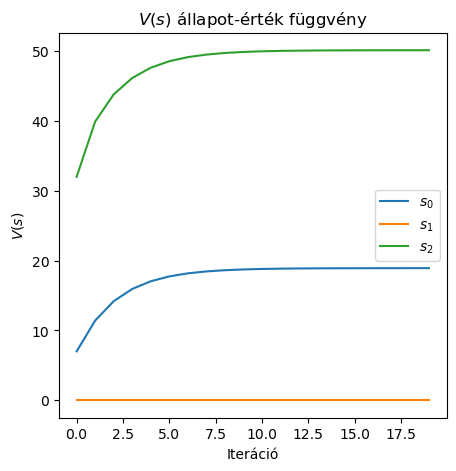

In [72]:
# Átalakítás
s0 = [v[0] for v in V_hist]
s1 = [v[1] for v in V_hist]
s2 = [v[2] for v in V_hist]

iter = range(len(V_hist))

plt.figure(figsize=(5,5))
plt.plot(iter, s0, label='$s_0$')
plt.plot(iter, s1, label='$s_1$')
plt.plot(iter, s2, label='$s_2$')
plt.title('$V(s)$ állapot-érték függvény')
plt.xlabel('Iteráció')
plt.ylabel('$V(s)$')
plt.legend()
plt.show()

Ez alapján elmondható, hogy a legjövedelmezőbb állapot az $a_2$.

## $Q(s,a)$ állapot-cselekvés minőség
$Q_{\pi}(s,a)=\sum_{s',r}p\left(s',r|s,a\right)\left[r+\gamma v_{\pi}\left(s'\right)\right]$

In [73]:
gamma = 0.90  # Diszkont ráta: próbáljuk ki különbözp diszkont rátákkal is!

# Q(s,a) inicializálása
Q = np.full((3, 3), -np.inf)  # -np.inf a lehetetlen cselekvésekre
for s, a in enumerate(A):
    Q[s, a] = 0.0   # Minden lehetséges cselekvésre

Q_hist = [] 
for _ in range(max_lepes):
    Q_prev = Q.copy()
    for s in range(n_s):  # Iteráció minden állapoton
        for a in A[s]:  # Iteráció minden cselekvésen
            Q[s, a] = np.sum([p_s_a[s][a][sp] * (R[s][a][sp] + gamma * np.max(Q_prev[sp])) for sp in range(3)])
    Q_hist.append(Q.copy())

Q_hist = np.array(Q_hist)
print('Állapot-cselekvés minőség függvény:')
print(Q, '\n')

Állapot-cselekvés minőség függvény:
[[18.91708362 17.02440517 13.61952413]
 [ 0.                -inf -4.88321069]
 [       -inf 50.13120307        -inf]] 



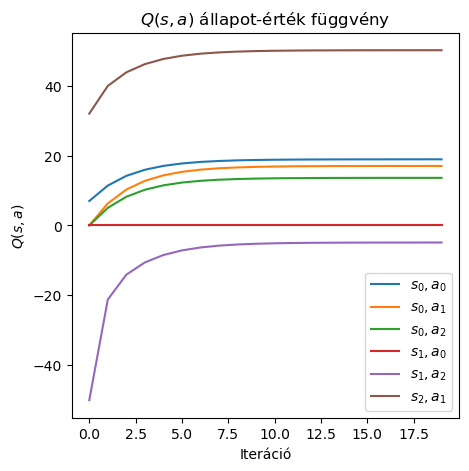

In [74]:
# Extract the value of state-action (0, 0) over iterations
Q_hist_extract = []
for i in range(n_s):
    for j in range(n_a):
        if Q_hist[0][i][j] == -np.inf:
            continue
        Q_hist_extract.append([i, j])
        for k in range(len(Q_hist)):
            Q_hist_extract[-1].append(Q_hist[k][i][j])

plt.figure(figsize=(5, 5))
for i in range(len(Q_hist_extract)):
    s = Q_hist_extract[i][0]
    a = Q_hist_extract[i][1]
    plt.plot(Q_hist_extract[i][2:], label=f'$s_{s}, a_{a}$')
plt.title('$Q(s,a)$ állapot-érték függvény')
plt.xlabel('Iteráció')
plt.ylabel('$Q(s,a)$')
plt.legend(loc='best')
plt.show()

A MDP esetében az optimális politika, amikor $0.90$-es diszkonttényezőt használ az ügynök az, hogy az $s_0$ állapotban az $a_0$ cselekvést választja, az $s_1$ állapotban az $a_0$ cselekvést választja, és végül az $s_2$ állapotban az $a_1$ cselekvést (az egyetlen lehetséges cselekvést).

## Mohó ügynök
$a_{t}=\underset{a}{argmax}\:Q_{t}(a)$  
A $Q(s,a)$ megadja minden állapothoz tartozóan az ügynök számára leginkább jövedelmező cselekvést. Ez elég arra, hogy fel lehessen állítani egy politikát: $\pi\in{S\rightarrow}A$

In [75]:
def moho_ugynok(s, Q):
    legjobb_A = np.argmax(Q, axis=1)
    return legjobb_A[s]

max_lepes = 100

r_sum = 0  # Teljes jutalom 
s = 0  # Kezdőállapot felvétele
for i in range(max_lepes):
    a = moho_ugynok(s, Q)
    sp = np.random.choice(range(n_s), p=p_s_a[s][a])
    r = R[s][a][sp]
    # print(f'i: {i}, s: {s}, a: {a}, r: {r}, s\': {sp}')
    s = sp
    r_sum += r

print(f'Teljes jutalom: {r_sum}')

Teljes jutalom: 20
